<a href="https://colab.research.google.com/github/Anish32/chronic-kidney-diseases-prediction/blob/main/Kidney_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
import kagglehub

path = kagglehub.dataset_download("mansoordaku/ckdisease")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ckdisease


In [4]:
df=pd.read_csv('/content/kidney_disease.csv')

In [5]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
df.shape

(400, 26)

In [7]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [8]:
df['classification'].value_counts()

,count
classification,
ckd,248
notckd,150
ckd\t,2


In [9]:
df.isnull().sum()

,0
id,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4


In [10]:

col={'age': 'age',
     'bp': 'blood_pressure',
     'sg': 'specific_gravity',
     'al': 'albumin',
     'su': 'sugar',
     'rbc': 'red_blood_cells',
     'pc': 'pus_cell',
     'pcc': 'pus_cell_clumps',
     'ba': 'bacteria',
     'bgr': 'blood_glucose_random',
     'bu': 'blood_urea',
     'sc': 'serum_creatinine',
     'sod': 'sodium',
     'pot': 'potassium',
     'hemo': 'hemoglobin',
     'pcv': 'packed_cell_volume',
     'wc': 'white_blood_cell_count',
     'rc': 'red_blood_cell_count',
     'htn': 'hypertension',
     'dm': 'diabetes_mellitus',
     'cad': 'coronary_artery_disease',
     'appet': 'appetite',
     'pe': 'pedal_edema',
     'ane': 'anemia',
     'classification': 'class'}
df.rename(columns=col, inplace=True)
df

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [11]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'],errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'],errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'],errors='coerce')

In [12]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [13]:
for col in cat_cols:
    unique_values = df[col].unique()
    print(f"Unique values in column '{col}':")
    print(unique_values)
    print("\n"+"="*60+"\n")

Unique values in column 'red_blood_cells':
[nan 'normal' 'abnormal']


Unique values in column 'pus_cell':
['normal' 'abnormal' nan]


Unique values in column 'pus_cell_clumps':
['notpresent' 'present' nan]


Unique values in column 'bacteria':
['notpresent' 'present' nan]


Unique values in column 'hypertension':
['yes' 'no' nan]


Unique values in column 'diabetes_mellitus':
['yes' 'no' ' yes' '\tno' '\tyes' nan]


Unique values in column 'coronary_artery_disease':
['no' 'yes' '\tno' nan]


Unique values in column 'appetite':
['good' 'poor' nan]


Unique values in column 'pedal_edema':
['no' 'yes' nan]


Unique values in column 'anemia':
['no' 'yes' nan]


Unique values in column 'class':
['ckd' 'ckd\t' 'notckd']




In [14]:
df['diabetes_mellitus']=df['diabetes_mellitus'].replace({'\tno':'no','\tyes':'yes',' yes':'yes'})
df['coronary_artery_disease']=df['coronary_artery_disease'].replace('\tno','no')
df['class']=df['class'].replace('ckd\t','ckd' )

In [15]:
for col in cat_cols:
    unique_values = df[col].unique()
    print(f"Unique values in column '{col}':")
    print(unique_values)
    print("\n"+"="*60+"\n")

Unique values in column 'red_blood_cells':
[nan 'normal' 'abnormal']


Unique values in column 'pus_cell':
['normal' 'abnormal' nan]


Unique values in column 'pus_cell_clumps':
['notpresent' 'present' nan]


Unique values in column 'bacteria':
['notpresent' 'present' nan]


Unique values in column 'hypertension':
['yes' 'no' nan]


Unique values in column 'diabetes_mellitus':
['yes' 'no' nan]


Unique values in column 'coronary_artery_disease':
['no' 'yes' nan]


Unique values in column 'appetite':
['good' 'poor' nan]


Unique values in column 'pedal_edema':
['no' 'yes' nan]


Unique values in column 'anemia':
['no' 'yes' nan]


Unique values in column 'class':
['ckd' 'notckd']




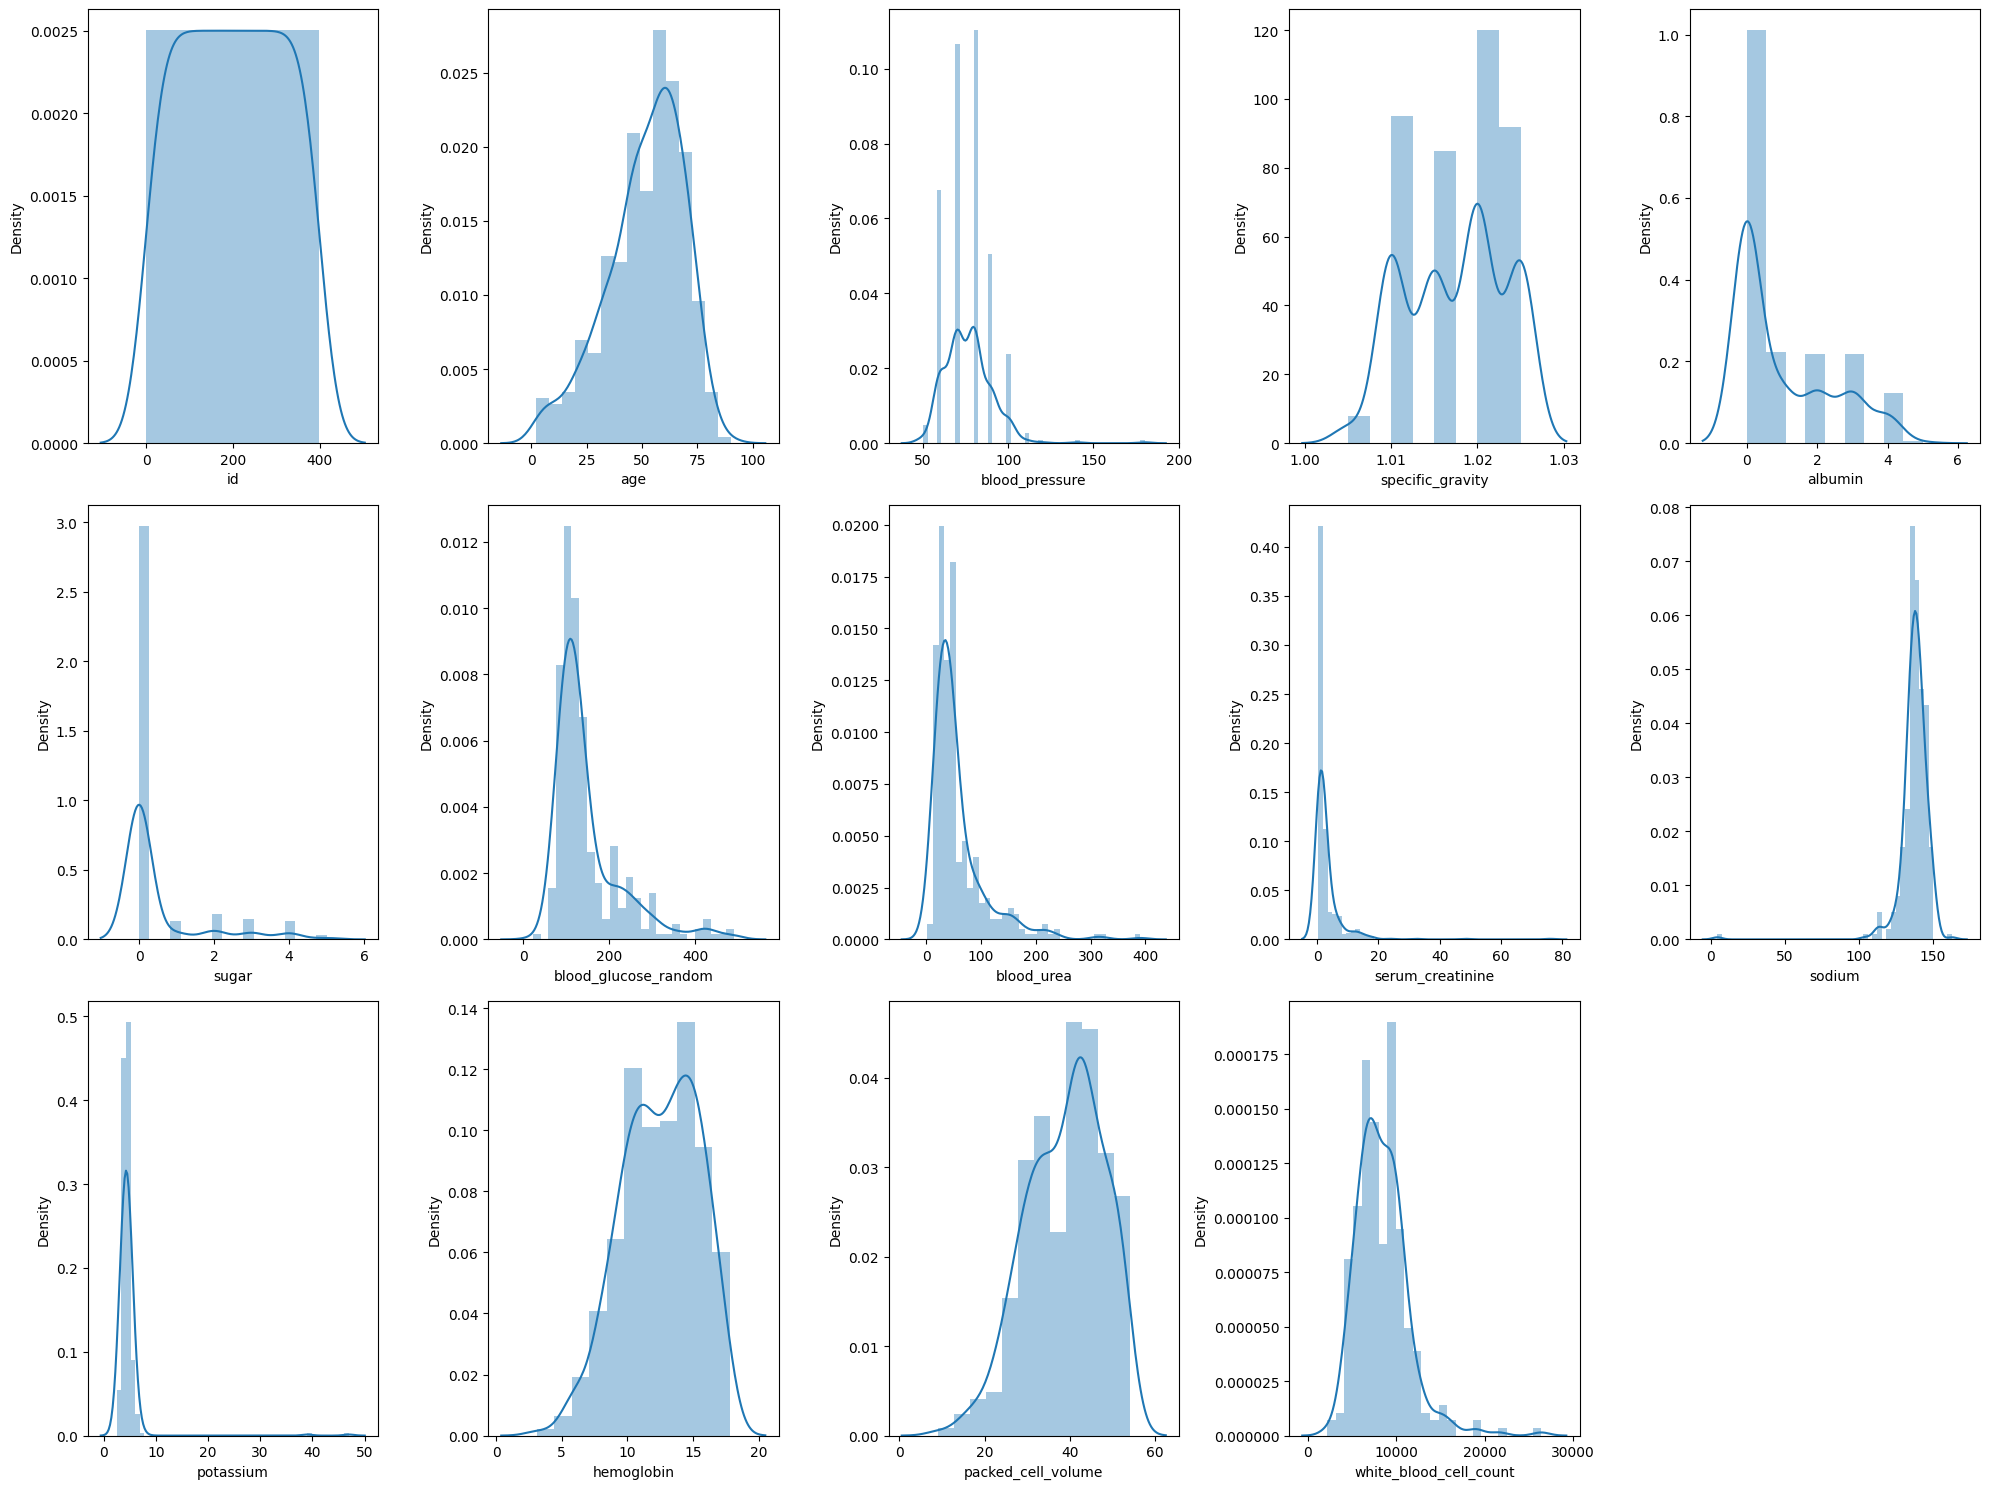

In [16]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

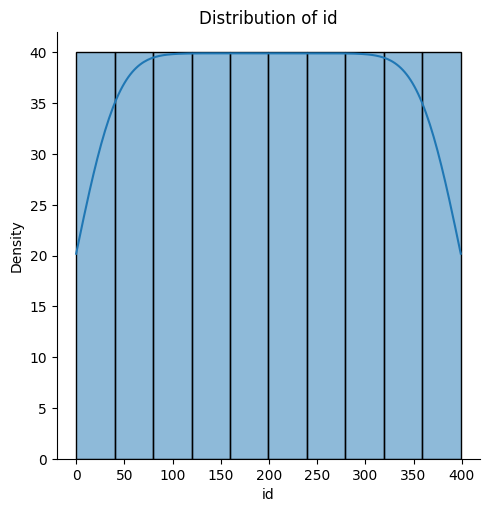

<Figure size 800x500 with 0 Axes>

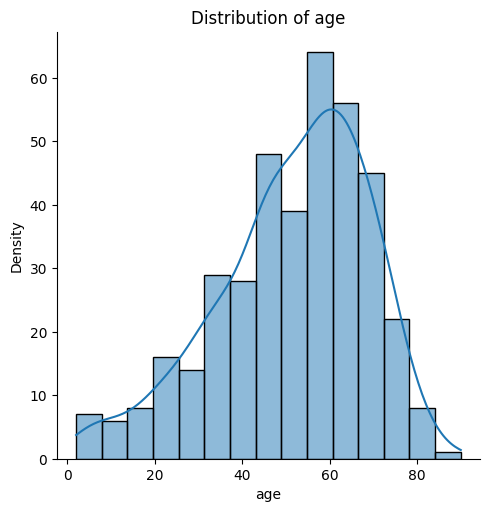

<Figure size 800x500 with 0 Axes>

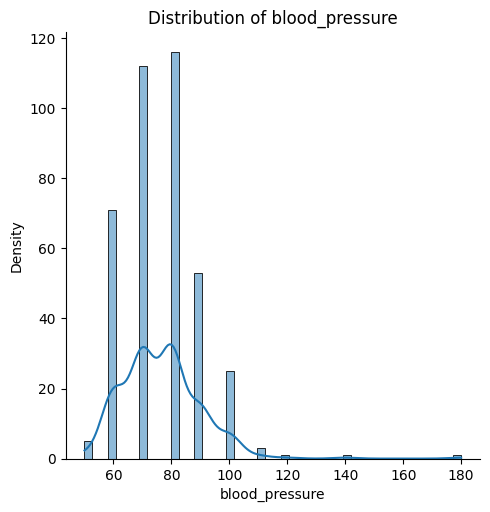

<Figure size 800x500 with 0 Axes>

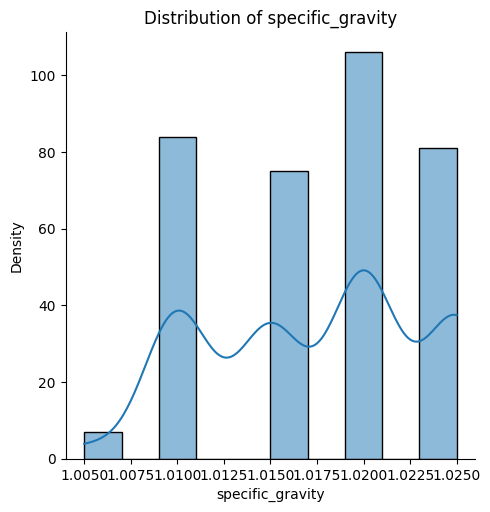

<Figure size 800x500 with 0 Axes>

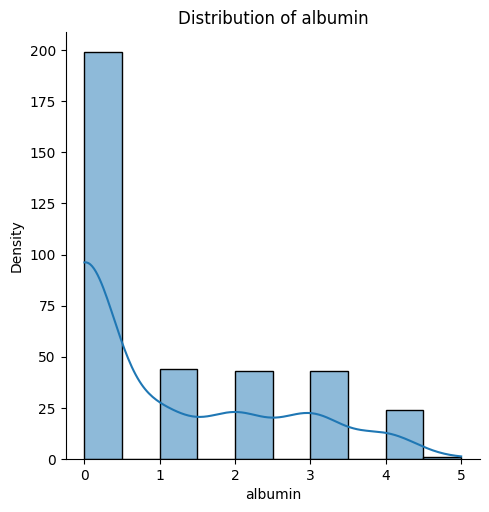

<Figure size 800x500 with 0 Axes>

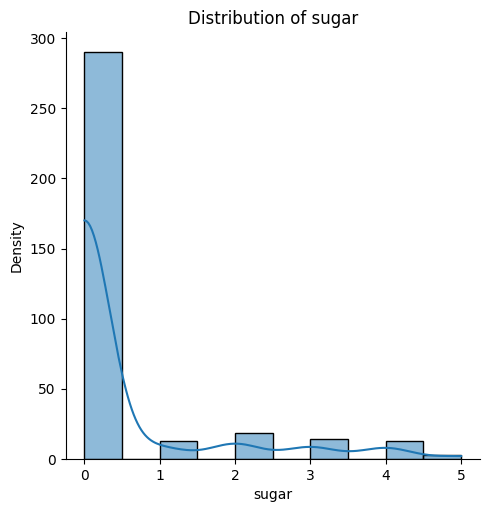

<Figure size 800x500 with 0 Axes>

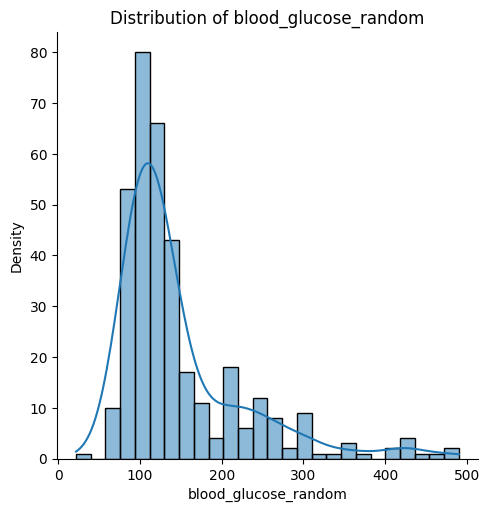

<Figure size 800x500 with 0 Axes>

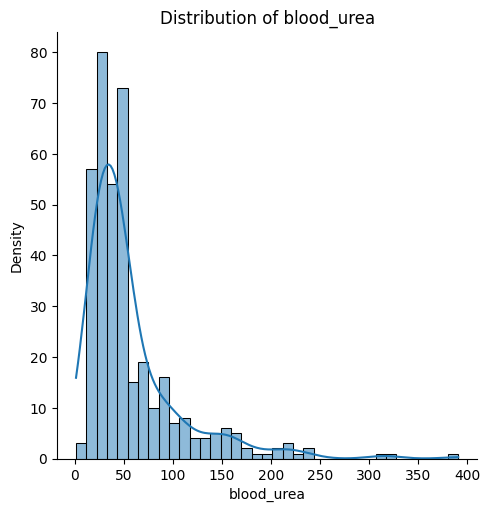

<Figure size 800x500 with 0 Axes>

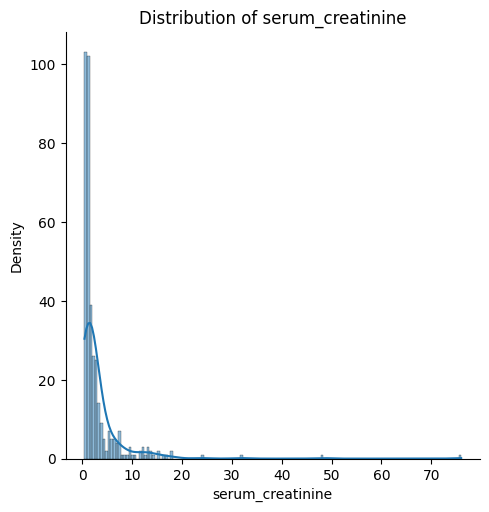

<Figure size 800x500 with 0 Axes>

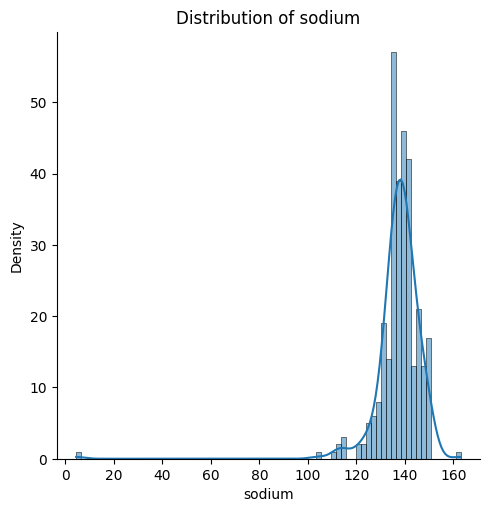

<Figure size 800x500 with 0 Axes>

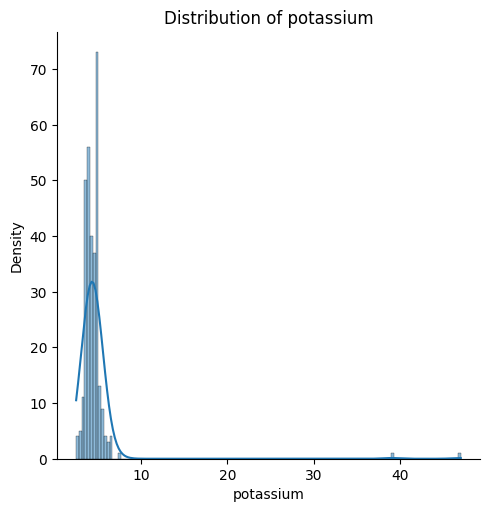

<Figure size 800x500 with 0 Axes>

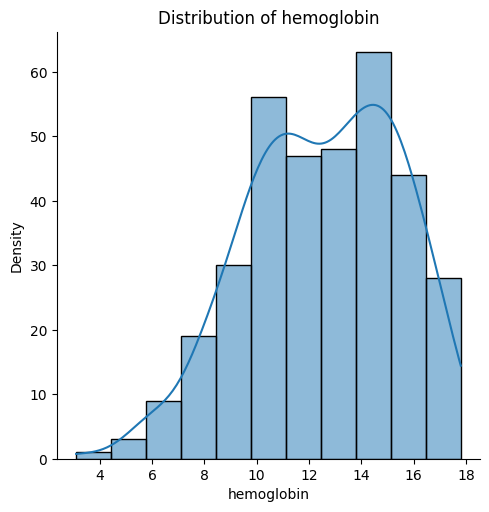

<Figure size 800x500 with 0 Axes>

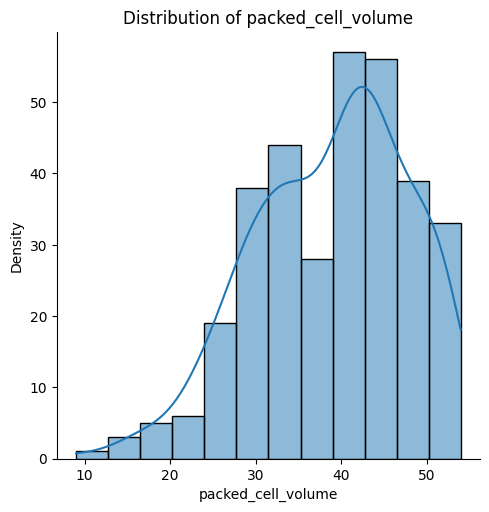

<Figure size 800x500 with 0 Axes>

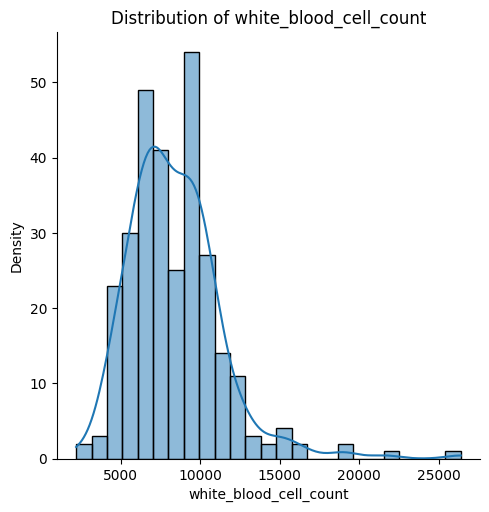

<Figure size 800x500 with 0 Axes>

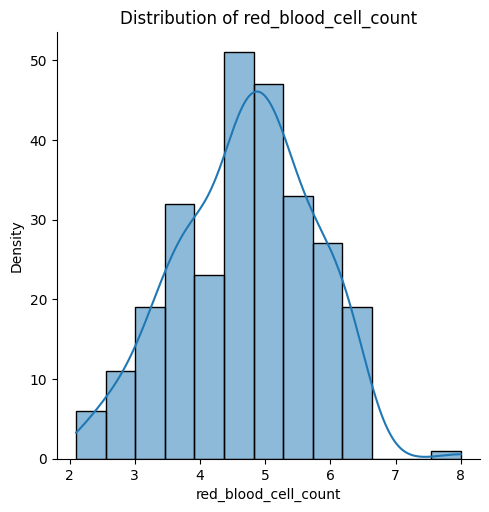

In [17]:
for col in num_cols:
    plt.figure(figsize= (8,5))
    sns.displot(df[col],kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

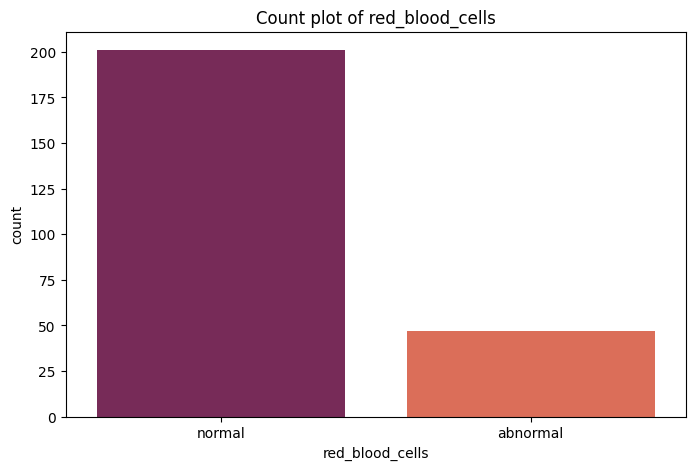

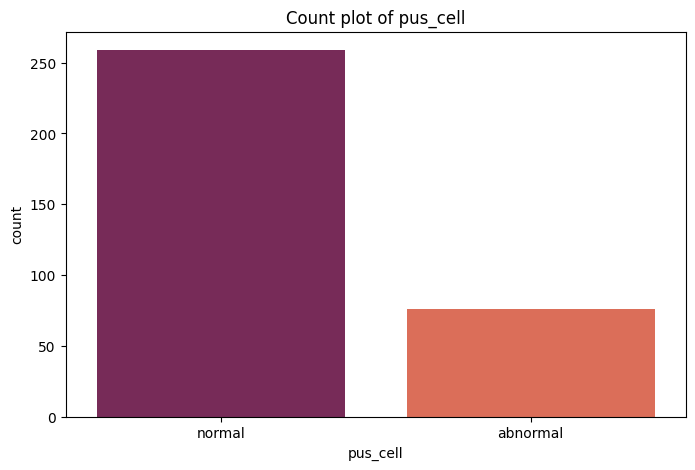

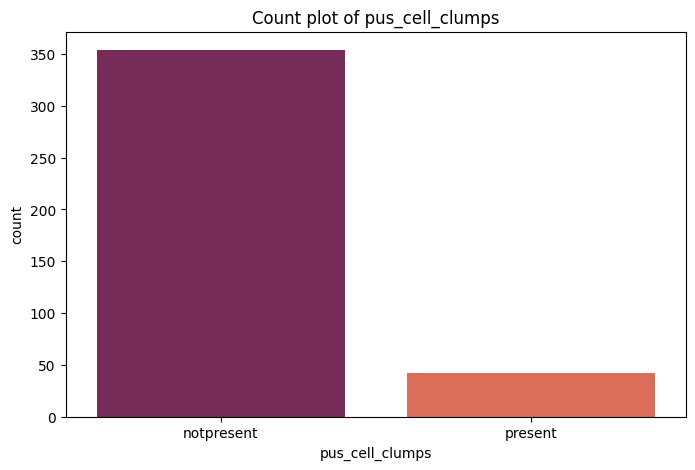

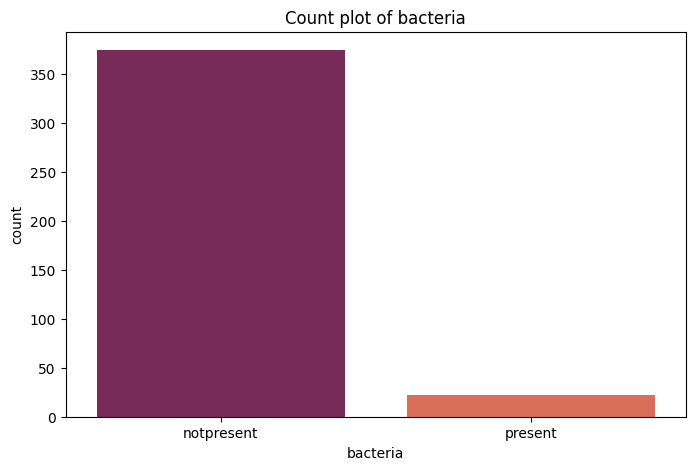

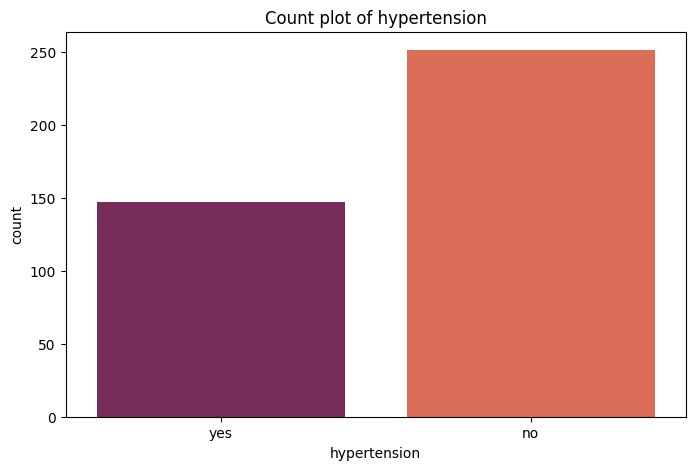

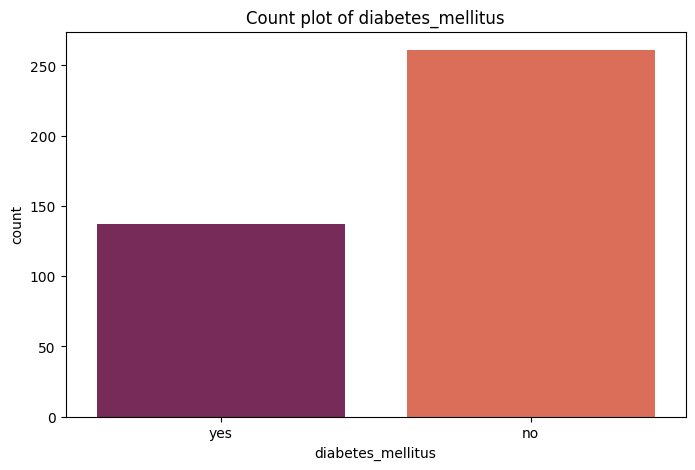

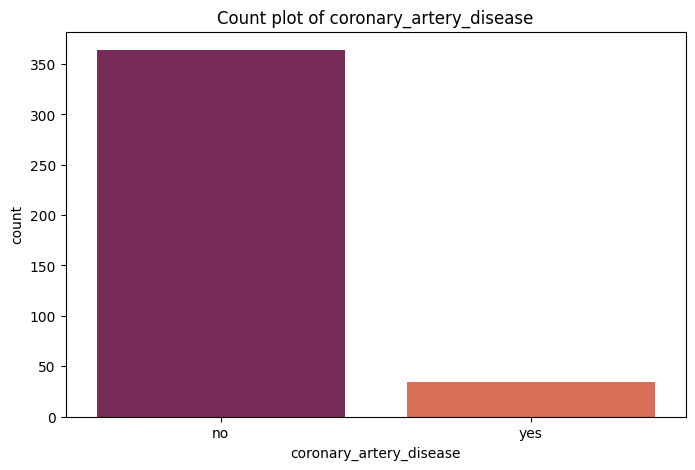

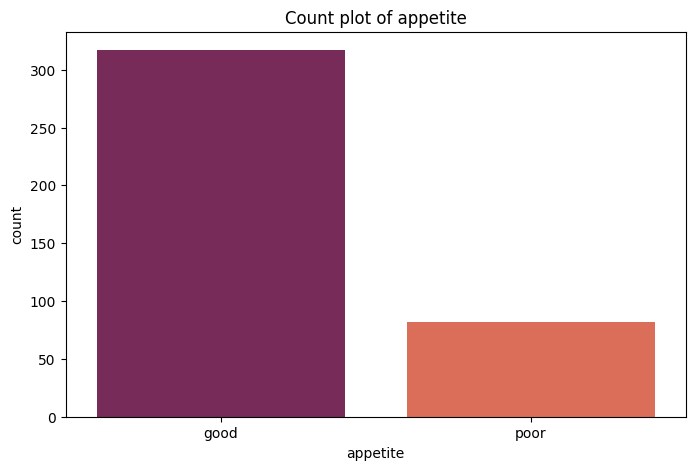

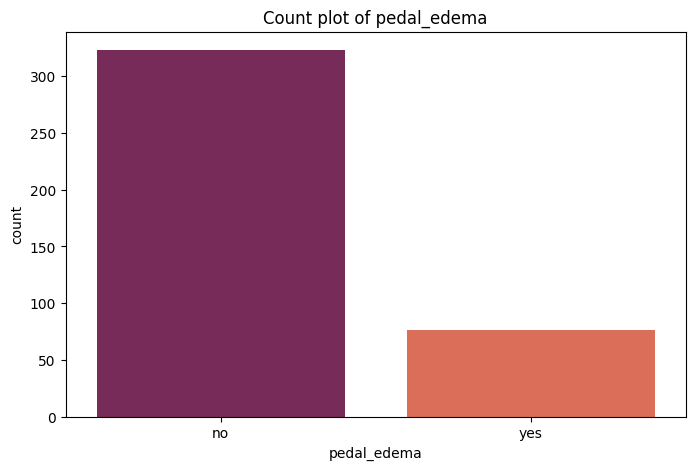

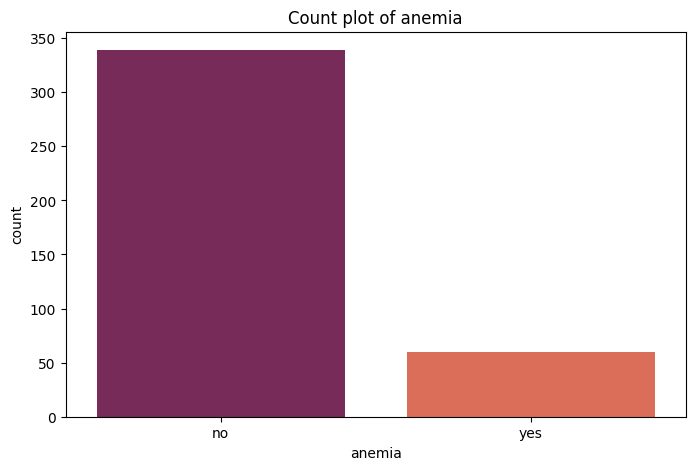

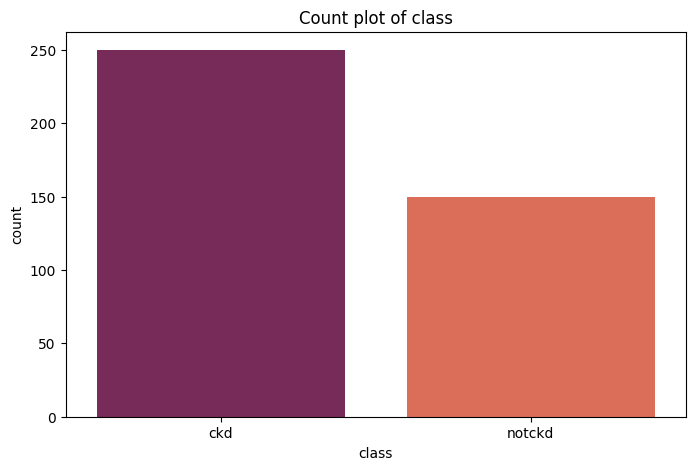

In [18]:
for col in cat_cols:
    plt.figure(figsize=(8,5))
    plt.title(f'Count plot of {col}')
    sns.countplot(x=df[col],palette='rocket')
    plt.xlabel(col)
    plt.show()

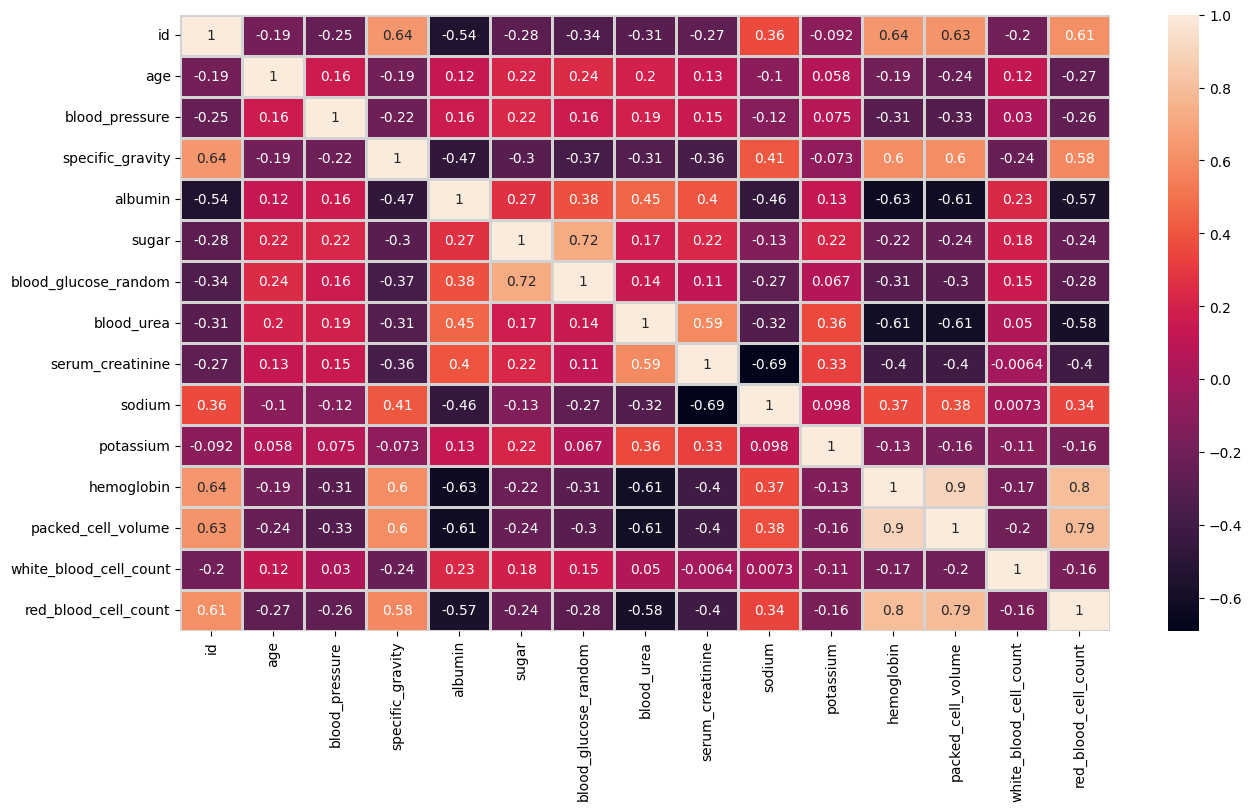

In [19]:
plt.figure(figsize = (15, 8))

sns.heatmap(df[num_cols].corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

In [20]:
df.isna().sum().sort_values(ascending = False)

,0
red_blood_cells,152
red_blood_cell_count,131
white_blood_cell_count,106
potassium,88
sodium,87
packed_cell_volume,71
pus_cell,65
hemoglobin,52
sugar,49
specific_gravity,47


In [21]:
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [22]:
for col in num_cols:
    random_value_imputation(col)

In [23]:
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [24]:
df.isna().sum().sort_values(ascending = False)

,0
id,0
age,0
blood_pressure,0
specific_gravity,0
albumin,0
sugar,0
red_blood_cells,0
pus_cell,0
pus_cell_clumps,0
bacteria,0


In [25]:
for col in cat_cols:
    print (f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

pedal_edema has 2 categories

anemia has 2 categories

class has 2 categories



In [26]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for col in cat_cols:
    df[col]=l.fit_transform(df[col])

In [27]:
df.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,38.0,6000.0,3.8,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.0,4.5,0,1,0,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


#Splitting data

In [28]:
x = df.drop(['class', 'id'], axis=1)
y = df['class']

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

#logisticregression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

LogisticRegression()

In [31]:
y_pred = log_reg.predict(X_test)

lg_accuracy = log_reg.score(X_test, y_test)

print(f"The accuracy of logistic regression:{lg_accuracy}\n")
print(f"Classification Report :- \n {classification_report(y_test, log_reg.predict(X_test))}")

The accuracy of logistic regression:0.9

Classification Report :- 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        72
           1       0.88      0.88      0.88        48

    accuracy                           0.90       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.90      0.90      0.90       120



#DecisionTreeClassifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)


dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [33]:
y_pred = dt.predict(X_test)

dt_accuracy = dt.score(X_test, y_test)
print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dt.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dt_accuracy} \n")
print(f"Classification Report :- \n {classification_report(y_test, dt.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9833333333333333 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        48

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



#randomforestclassifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
y_pred = rf.predict(X_test)

rf_accuracy = rf.score(X_test, y_test)
print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rf_accuracy} \n")
print(f"Classification Report :- \n {classification_report(y_test, rf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.9833333333333333 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



#svm

In [36]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1, random_state=42)

svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [37]:
y_pred = svm.predict(X_test)

SVM_accuracy = svm.score(X_test, y_test)
print("SVM Accuracy:", SVM_accuracy)
print(f"Classification Report :- \n {classification_report(y_test, svm.predict(X_test))}")

SVM Accuracy: 0.95
Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.93      0.96        72
           1       0.90      0.98      0.94        48

    accuracy                           0.95       120
   macro avg       0.94      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



#knn

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)

knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
y_pred = knn_clf.predict(X_test)

knn_accuracy = knn_clf.score(X_test, y_test)
print(f"Training Accuracy of Knn is {accuracy_score(y_train, knn_clf.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_accuracy} \n")
print(f"Classification Report :- \n {classification_report(y_test, knn_clf.predict(X_test))}")

Training Accuracy of Knn is 0.8035714285714286
Test Accuracy of KNN is 0.675 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.73      0.72      0.73        72
           1       0.59      0.60      0.60        48

    accuracy                           0.68       120
   macro avg       0.66      0.66      0.66       120
weighted avg       0.68      0.68      0.68       120



#AdaBoostClassifier

In [40]:
from sklearn.ensemble import AdaBoostClassifier

dtc = DecisionTreeClassifier(random_state=42)

ada = AdaBoostClassifier(estimator=dtc)
ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42))

In [41]:
ada_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, ada.predict(X_test))}")

Training Accuracy of Ada Boost Classifier is 1.0
Test Accuracy of Ada Boost Classifier is 0.975 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.94      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



#GradientBoostingClassifier

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [43]:
gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 0.9666666666666667 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.92      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



#XGBClassifier

In [44]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [45]:
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XgBoost is 1.0
Test Accuracy of XgBoost is 0.9833333333333333 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



#CatBoostClassifier

In [46]:
!pip install catboost

In [47]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

catboost_clf = CatBoostClassifier(iterations=100,
                                 learning_rate=0.1,
                                 depth=6,
                                 loss_function='Logloss',
                                 verbose=False
                                 )


catboost_clf.fit(X_train, y_train)

In [48]:
y_pred = catboost_clf.predict(X_test)

catboost_accuracy = accuracy_score(y_test, y_pred)
print(f"Training Accuracy of CatBoost is {accuracy_score(y_train, catboost_clf.predict(X_train))}")
print(f"Test Accuracy of CatBoost is {catboost_accuracy} \n")
print("Classification Report:\n", classification_report(y_test, y_pred))

Training Accuracy of CatBoost is 1.0
Test Accuracy of CatBoost is 0.9916666666666667 

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [49]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Logistic Regression','SVM','AdaBoostClassifier','GradientBoostingClassifier','XGBClassifier','CatBoostClassifier'],
    'Score' : [knn_accuracy,dt_accuracy, rf_accuracy,lg_accuracy,SVM_accuracy,ada_acc,gb_acc,xgb_acc,catboost_accuracy]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
8,CatBoostClassifier,0.991667
7,XGBClassifier,0.983333
1,Decision Tree Classifier,0.983333
2,Random Forest Classifier,0.983333
5,AdaBoostClassifier,0.975000
6,GradientBoostingClassifier,0.966667
4,SVM,0.950000
3,Logistic Regression,0.900000
0,KNN,0.675000


In [50]:
models.to_csv("models.csv", index=False)

#keras

In [51]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

In [52]:
model = Sequential()
model.add(Dense(15, activation='relu', input_dim=24))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(15, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 15)                  │             375 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 15)                  │              60 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 15)                  │              60 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 751 (2.93 KB)

 Trainable params: 691 (2.70 KB)

 Non-trainable params: 60 (240.00 B)

In [53]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
callback = EarlyStopping(monitor='val_loss',
                        min_delta=0.0001,
                        patience=20,
                        verbose=1,
                        mode='auto',
                        baseline=None,
                        restore_best_weights=False)

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)


X_test_scaled = scaler.transform(X_test)

history = model.fit(X_train_scaled, y_train, epochs=500, validation_data=(X_test_scaled, y_test), callbacks=callback)

Epoch 1/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 297ms/step - accuracy: 0.7827 - loss: 0.5474 - val_accuracy: 0.7417 - val_loss: 0.4894
Epoch 2/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7512 - loss: 0.4802 - val_accuracy: 0.8500 - val_loss: 0.4390
Epoch 3/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7913 - loss: 0.4193 - val_accuracy: 0.9250 - val_loss: 0.3985
Epoch 4/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7822 - loss: 0.3968 - val_accuracy: 0.9500 - val_loss: 0.3649
Epoch 5/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8341 - loss: 0.3758 - val_accuracy: 0.9333 - val_loss: 0.3316
Epoch 6/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8725 - loss: 0.3126 - val_accuracy: 0.9500 - val_loss: 0.3036
Epoch 7/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8569 - loss: 0.3296 - val_accuracy: 0.9417 - val_loss: 0.2776
Epoch 8/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8932 - loss: 0.2492 - val_accuracy: 0.9417 - val_loss

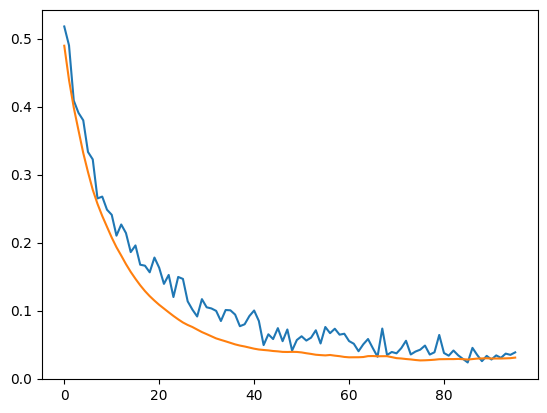

In [55]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.show()

In [56]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9819 - loss: 0.0279 
Test Accuracy: 0.9833
Test Loss: 0.0308


In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test_scaled)
y_pred_labels = (y_pred > 0.5).astype(int)  # Threshold at 0.5

print(classification_report(y_test, y_pred_labels))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        48

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



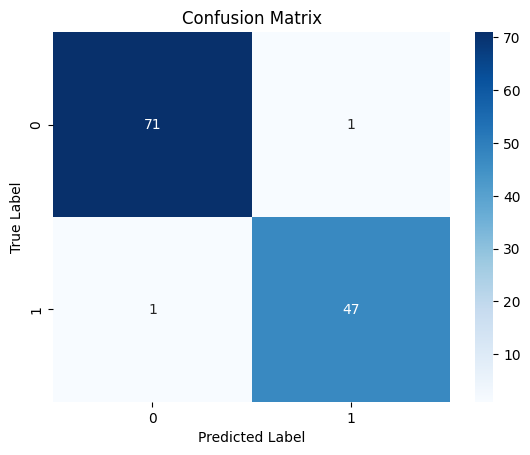

In [58]:
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [59]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score, f1_score, confusion_matrix


def plot_auc(t_y, p_y):
  fpr, tpr, thresholds = roc_curve(t_y, p_y, pos_label=1)
  fig, c_ax = plt.subplots(1,1, figsize=(9,9))
  c_ax.plot(fpr, tpr, label='%s (AUC:%0.2f' % ('classification', auc(fpr, tpr)))
  c_ax.plot([0,1],[0,1],color='navy', lw=1,linestyle='--')
  c_ax.legend()
  c_ax.set_xlabel('False Positive Rate')
  c_ax.set_ylabel('True Positive Rate')


def plot_precision_recall_curve_helper(t_y, p_y):
  fig, c_ax = plt.subplots(1,1, figsize=(9,9))
  precision, recall, thresholds = precision_recall_curve(t_y, p_y, pos_label=1)
  aps = average_precision_score(t_y, p_y)
  c_ax.plot(precision, recall, label='%s (AP Score:%0.2f' % ('classification', aps))
  c_ax.plot(recall,precision,color='red', lw=2)
  c_ax.legend()
  c_ax.set_xlabel('Recall')
  c_ax.set_ylabel('Precision')


def plot_history(history):
  f = plt.figure()
  f.set_figwidth(15)

  f.add_subplot(1,2,1)
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.plot(history.history['loss'], label='Training_loss')
  plt.legend()
  plt.title('Model Loss')

  f.add_subplot(1,2,2)
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.plot(history.history['accuracy'], label='Training_accuracy')
  plt.legend()
  plt.title('Model Accuracy')


  plt.show()

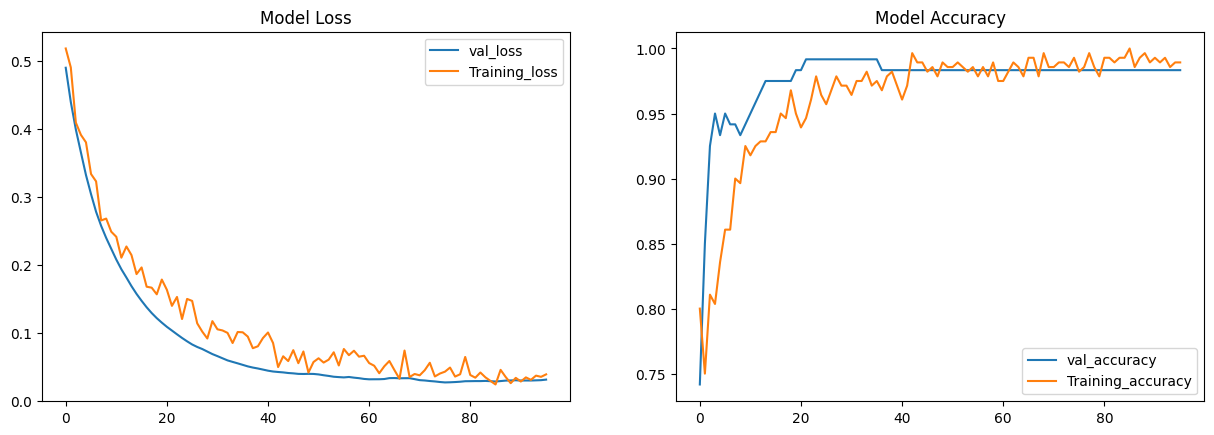

In [60]:
plot_history(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


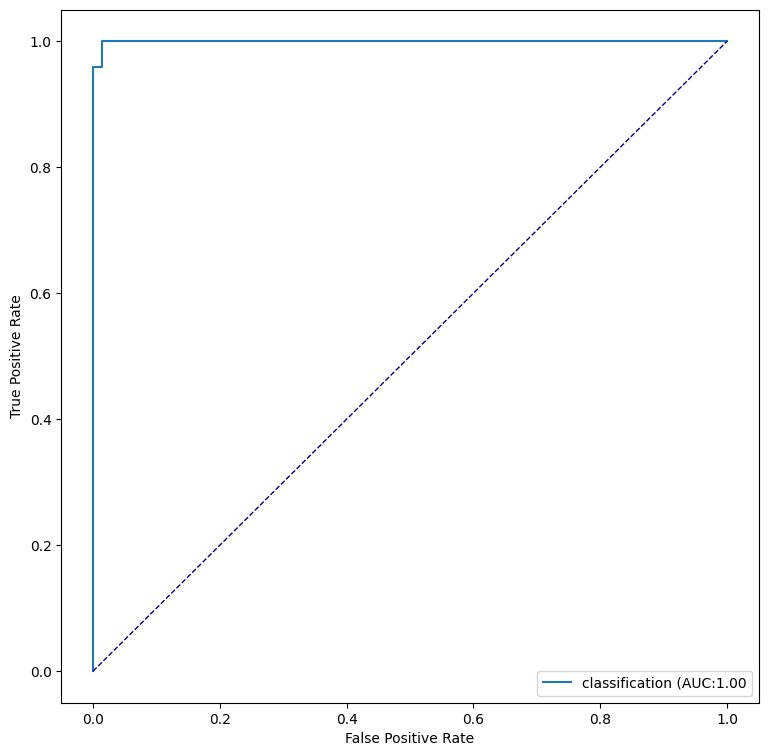

In [61]:
plot_auc(y_test, model.predict(X_test_scaled, verbose=True))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


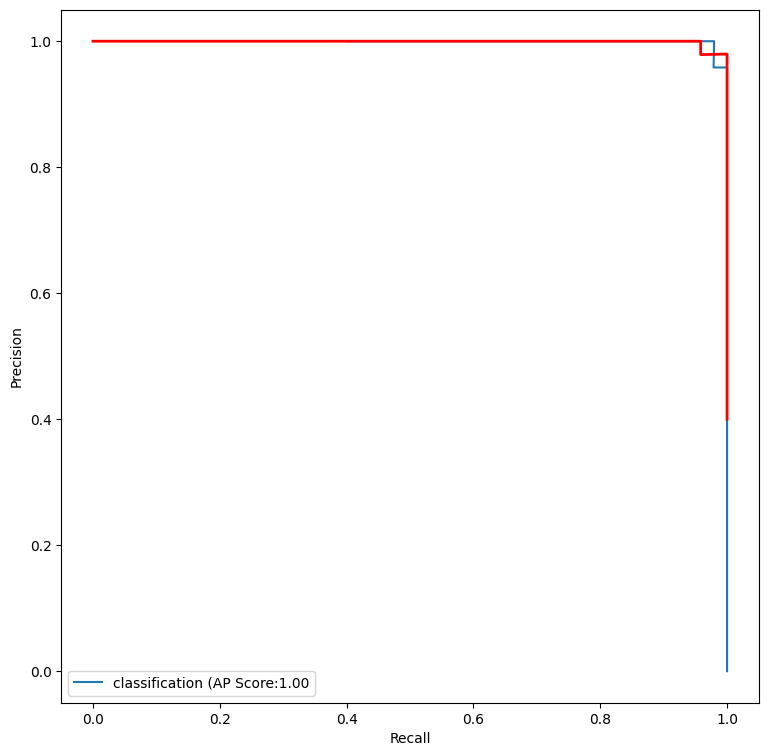

In [62]:
plot_precision_recall_curve_helper(y_test, model.predict(X_test_scaled, verbose=True))

In [63]:
def calc_f1(precision, recall):
  return 2*(precision*recall)/(precision+recall) if recall and precision else 0

precision, recall, thresholds = precision_recall_curve(y_test, model.predict(X_test_scaled, verbose=True))

f1_score = [calc_f1(precision[i], recall[i]) for i in range(len(thresholds))]
idx = np.argmax(f1_score)
threshold = thresholds[idx]

print("Precision = "+str(precision[idx]))
print("Recall = "+str(recall[idx]))
print("Threshold = "+str(thresholds[idx]))
print("F1 score = "+str(f1_score[idx]))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Precision = 0.9795918367346939
Recall = 1.0
Threshold = 0.18385394
F1 score = 0.9896907216494846


Text(0, 0.5, 'f1 score')

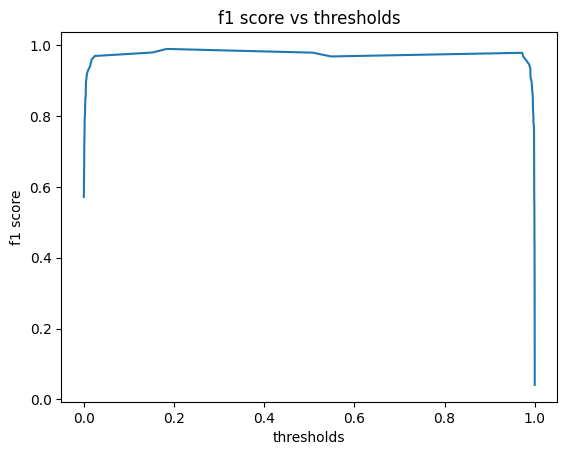

In [64]:
plt.figure()
plt.plot(thresholds,f1_score)
plt.title("f1 score vs thresholds")
plt.xlabel("thresholds")
plt.ylabel("f1 score")

In [65]:
import plotly.express as px

models_sorted = models.sort_values(by='Score', ascending=True)

fig = px.bar(
    data_frame=models_sorted,
    x='Score',
    y='Model',
    color='Score',
    template='plotly_dark',
    title='Models Comparison',
    orientation='h'
)

fig.show()

In [66]:
import plotly.express as px

models_sorted = models.sort_values(by='Score', ascending=False)

fig = px.line(
    models_sorted,
    x='Model',
    y='Score',
    title='Model Performance Comparison',
    markers=True
)

fig.update_layout(
    xaxis_title='Model',
    yaxis_title='Score',
    xaxis={'tickangle': 45, 'tickmode': 'linear'},
    template='plotly_dark'
)

fig.show()

In [ ]:
!pip install streamlit

In [68]:
import pickle

with open('ckd_model.pkl', 'wb') as file:
    pickle.dump(xgb, file)

In [69]:
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle

with open('ckd_model.pkl', 'rb') as file:
    model = pickle.load(file)

st.title("Chronic Kidney Disease Prediction")

age = st.number_input("Age")
bp = st.number_input("Blood Pressure")
sg = st.number_input("Specific Gravity")
al = st.number_input("Albumin")
su = st.number_input("Sugar")
rbc = st.selectbox("Red Blood Cells", [0, 1])
pc = st.selectbox("Pus Cell", [0, 1])
pcc = st.selectbox("Pus Cell Clumps", [0, 1])
ba = st.selectbox("Bacteria", [0, 1])
bgr = st.number_input("Blood Glucose Random")
bu = st.number_input("Blood Urea")
sc = st.number_input("Serum Creatinine")
sod = st.number_input("Sodium")
pot = st.number_input("Potassium")
hemo = st.number_input("Hemoglobin")
pcv = st.number_input("Packed Cell Volume")
wc = st.number_input("White Blood Cell Count")
rc = st.number_input("Red Blood Cell Count")
htn = st.selectbox("Hypertension", [0, 1])
dm = st.selectbox("Diabetes Mellitus", [0, 1])
cad = st.selectbox("Coronary Artery Disease", [0, 1])
appet = st.selectbox("Appetite", [0, 1])
pe = st.selectbox("Pedal Edema", [0, 1])
ane = st.selectbox("Anemia", [0, 1])



if st.button("Predict"):

    input_data = pd.DataFrame([[age, bp, sg, al, su, rbc, pc, pcc, ba, bgr, bu, sc, sod, pot, hemo, pcv, wc, rc, htn, dm, cad, appet, pe, ane]],
                             columns=['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
                                      'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine',
                                      'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count',
                                      'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
                                      'appetite', 'pedal_edema', 'anemia'])


    prediction = model.predict(input_data)

    if prediction[0] == 0:
        st.success("The patient is predicted to not have Chronic Kidney Disease.")
    else:
        st.error("The patient is predicted to have Chronic Kidney Disease.")

Overwriting app.py


In [70]:
!wget -q -O - ipv4.icanhazip.com

34.143.182.108


In [72]:
! streamlit run app.py & npx localtunnel --port 8501



⠙⠹
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.143.182.108:8501

⠸⠼your url is: https://tangy-rules-create.loca.lt
  Stopping...
^C
